### Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Dataset

In [2]:
country_data = pd.read_csv("Country-data.csv")
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country_data.shape

(167, 10)

## Data Cleaning
    - Check for Null values and impute/drop
    - Check for duplicates

In [4]:
#Checking the count of null records
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

- Since there is no null record, we do not need to drop any records or impute any missing information

In [5]:
#drop duplicate records if any
country_data.drop_duplicates(inplace=True)
country_data.shape

(167, 10)

- So there were no duplicates in the dataset, hence the original count of records remained intact

In [6]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
country_data.describe(percentiles = [0.25,0.5,0.75,0.90,0.95,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


- The values appear to be increasing gradually and hence no significant outlier appears to be seen in the data. So we can go ahead with this data

## Data Preparation - I
    - Convert data to appropriate data types
    - Derive new values to get more meaningful insights

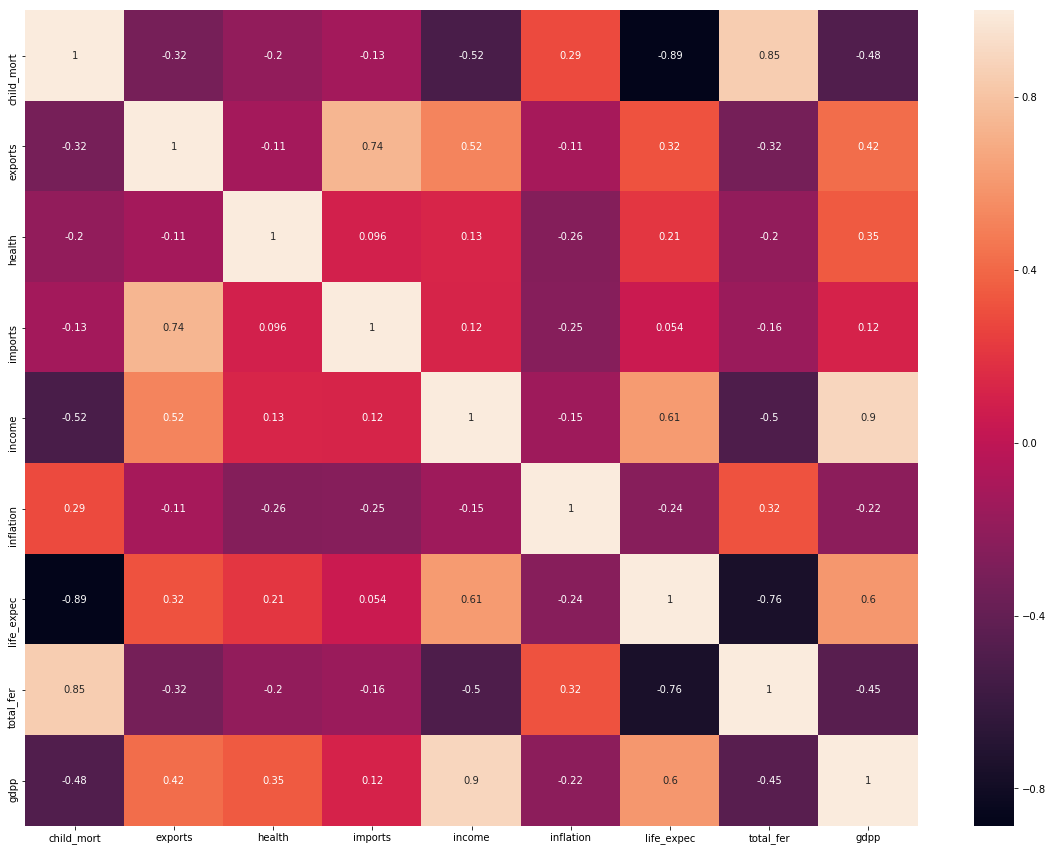

In [8]:
plt.figure(figsize=(20,15))
sns.heatmap(country_data.corr(),annot=True)

In [9]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 14.4+ KB


- The data types of all variables is already Numeric and hence no explicit datatype conversion is required
- To perform PCA, we need to have all variables on numeric scale. Hence lets drop countries column before moving ahead with PCA

In [10]:
country_data_for_pca = country_data.copy(deep=True)
country_data_for_pca.drop(['country'],axis=1,inplace=True)
country_data_for_pca.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Feature Scaling
- As we see, different variables are on different scales. For eg., attribute income has values that are way higher than variables health, exports, child_mort, imports etc.
- Lets use Standard Scalar and standardize the variables

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
std_scaler = StandardScaler()
country_data_for_pca[list(country_data_for_pca.columns)] = std_scaler.fit_transform(country_data_for_pca[list(country_data_for_pca.columns)])
country_data_for_pca.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### PCA on the Data
- We will only apply PCA on the we scaled and not on the un-scaled raw version as values on different scales may make the components biased

In [13]:
from sklearn.decomposition import PCA

In [14]:
#help(PCA)

In [15]:
pca = PCA(svd_solver='auto',random_state=100)

In [16]:
pca.fit(country_data_for_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [18]:
colnames = list(country_data_for_pca.columns)
pca_components_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature' : colnames})
pca_components_df

,PC1,PC2,Feature
0,-0.419519,0.192884,child_mort
1,0.283897,0.613163,exports
2,0.150838,-0.243087,health
3,0.161482,0.671821,imports
4,0.398441,0.022536,income
5,-0.193173,-0.008404,inflation
6,0.425839,-0.222707,life_expec
7,-0.403729,0.155233,total_fer
8,0.392645,-0.046022,gdpp


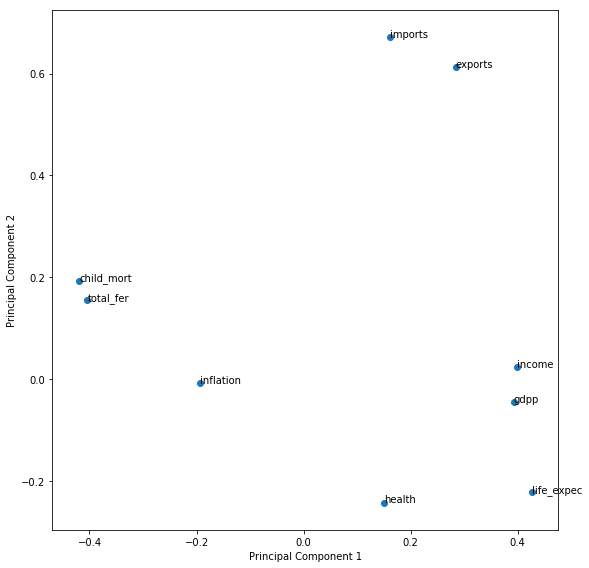

In [19]:
# Let's plot them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_components_df.PC1, pca_components_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_components_df.Feature):
    plt.annotate(txt, (pca_components_df.PC1[i],pca_components_df.PC2[i]))
plt.tight_layout()
plt.show()

- As we see above child_mort, total_fer, life_expec, income, gdpp influence the first Principal component the most. These would contribute to our final Clusters as the driving features

### Scree Plot
- Whatever Principal components we got till now considered all the features as the principal components
- Lets assess with the help of Scree Plot if we can reduce this dimensionality yet capturing the maximum variance

In [20]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [21]:
pd.DataFrame({'Feature':colnames,'Variance_%':pca.explained_variance_ratio_*100})

,Feature,Variance_%
0,child_mort,45.951740
1,exports,17.181626
2,health,13.004259
3,imports,11.053162
4,income,7.340211
5,inflation,2.484235
6,life_expec,1.260430
7,total_fer,0.981282
8,gdpp,0.743056


In [22]:
#help(PCA)
#pca.explained_variance_


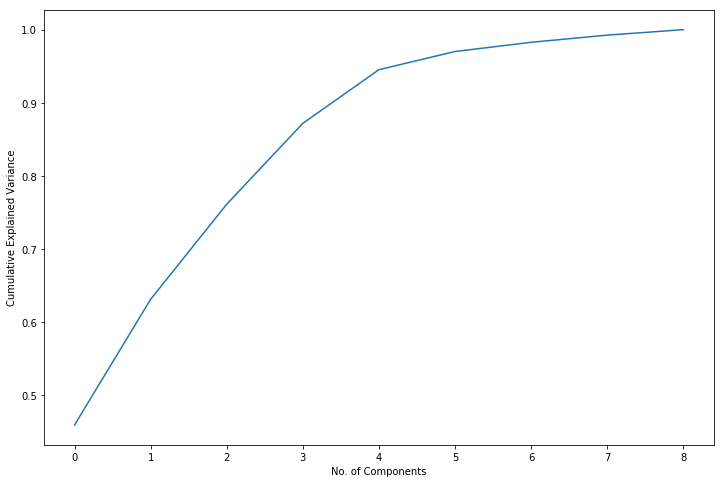

In [23]:
#lets use cumulative sum to plot the scree plot
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

- It appears from above that 5 components are able to explain almost 95% (94.53) of the variance. Hence we need not pick all variables and go ahead with 5 components

In [24]:
from sklearn.decomposition import IncrementalPCA
pca_inc = IncrementalPCA(n_components = 5)

In [25]:
df_pca1 = pca_inc.fit_transform(country_data_for_pca)
df_pca1

array([[-2.91299992e+00,  9.19694483e-02, -7.21242475e-01,
         1.00183771e+00, -1.46764708e-01],
       [ 4.29869882e-01, -5.89373005e-01, -3.28611009e-01,
        -1.16501385e+00,  1.53205240e-01],
       [-2.85288747e-01, -4.52138721e-01,  1.23205055e+00,
        -8.57767020e-01,  1.91227155e-01],
       [-2.93271361e+00,  1.69877055e+00,  1.52507602e+00,
         8.55595497e-01, -2.14777969e-01],
       [ 1.03337146e+00,  1.33852736e-01, -2.16699200e-01,
        -8.46637655e-01, -1.93186250e-01],
       [ 2.28903436e-02, -1.77273550e+00,  8.64499533e-01,
        -3.67466174e-02,  9.97895254e-01],
       [-1.01463164e-01, -5.67317984e-01,  2.48106950e-01,
        -1.46602345e+00, -8.58319260e-02],
       [ 2.34215326e+00, -1.98970971e+00,  1.98795068e-01,
         1.11341263e+00, -7.10653789e-01],
       [ 2.97384111e+00, -7.35152104e-01, -5.28284369e-01,
         1.20110137e+00,  8.01665136e-02],
       [-1.81302843e-01, -3.96894805e-01,  8.68398935e-01,
        -4.35201409e-01

In [26]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca1)
pc

array([[-2.91299992e+00,  4.29869882e-01, -2.85288747e-01,
        -2.93271361e+00,  1.03337146e+00,  2.28903436e-02,
        -1.01463164e-01,  2.34215326e+00,  2.97384111e+00,
        -1.81302843e-01,  1.26873963e+00,  1.67102427e+00,
        -1.12397899e+00,  1.08119637e+00,  5.80574302e-01,
         3.14375619e+00,  2.10907505e-01, -2.67300470e+00,
        -1.56696054e-01, -7.94150509e-01,  9.95908594e-01,
        -8.81575681e-01,  1.41006684e-01,  2.46067532e+00,
         9.06504214e-01, -3.12242958e+00, -2.89891128e+00,
        -5.82622058e-01, -2.80833175e+00,  2.54377573e+00,
        -1.56104788e-01, -3.96515838e+00, -3.55824937e+00,
         9.51656073e-01,  5.74753018e-02,  1.21020692e-01,
        -2.09401880e+00, -3.17342051e+00, -1.72575439e+00,
         9.37737821e-01, -2.58213226e+00,  1.14879637e+00,
         2.17440691e+00,  2.05308311e+00,  3.01064195e+00,
        -2.31280333e-01,  9.44562646e-03, -8.48190862e-01,
         8.17296557e-02, -1.29326387e+00, -2.47466417e+0

In [27]:
df_train_pca = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})
#df_train_pca = pd.DataFrame(pca_inc.fit_transform(country_data_for_pca))

In [28]:
df_train_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


In [29]:
#help(IncrementalPCA.fit_transform)

In [30]:
corr_after_pca = pd.DataFrame(df_train_pca).corr()

In [31]:
#help(np.corrcoef(x))

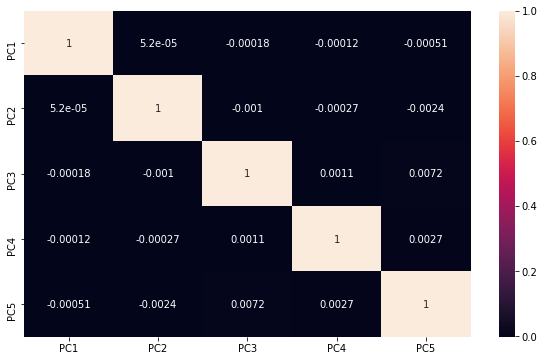

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_after_pca,annot=True)

- The correlation coefficients are close to zero, hence the principal components we got are orthogonal and we do not have the issue of Multicollinearity

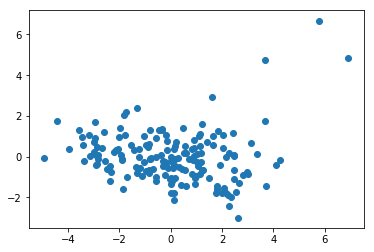

In [33]:
plt.scatter(x='PC1',y='PC2',data=df_train_pca)

- Lets try to find clusters in the above data

### Hopkins Test
- Lets check whether the dataset we have is suitable for clustering or not

In [34]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [35]:
hopkins(df_train_pca)

0.845316987022627

- As the hopkins score lies above 0.5, this data set is good for clustering. So we can go ahead and perform clustering on this

In [36]:
#help(IncrementalPCA)
# To perform KMeans clustering 
from sklearn.cluster import KMeans
#help(KMeans)

### Finding the optimum k (number of Clusters)

#### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [37]:
df_train_pca2 = df_train_pca

In [38]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k).fit(df_train_pca2)
    sse_.append([k, silhouette_score(df_train_pca2, kmeans.labels_)])

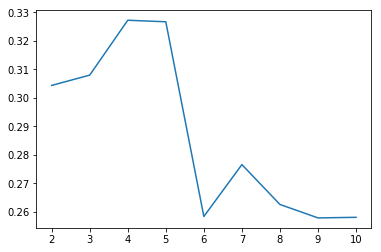

In [39]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

- 4 seems to be a reasonable choice for number of clusters
- Lets examine the same with Elbow curve method as well

## Sum of Squared Distances

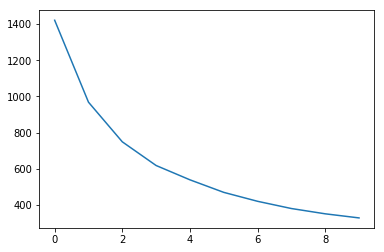

In [40]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,11)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_train_pca2)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

- From above also, 4 seems to be a reasonable choice for number of clusters

In [41]:
model_clus = KMeans(n_clusters=4, max_iter=50, random_state=50)

In [42]:
model_clus.fit(df_train_pca2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [43]:
#df_train_pca_clustered_pca
#df_train_pca2

In [45]:
# analysis of clusters formed
df_pca_clustered = df_train_pca2
df_pca_clustered.index = pd.RangeIndex(len(df_pca_clustered))
#RFM.index = pd.RangeIndex(len(RFM.index))
df_pca_clustered_pca = pd.concat([df_pca_clustered, pd.Series(model_clus.labels_)], axis=1)
df_pca_clustered_pca.columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','ClusterID']
df_pca_clustered_pca.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,2
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,2
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,2


- Merge with the main dataset to join with the cluster information

In [46]:
df_pca_clustered_km=pd.merge(country_data,df_pca_clustered_pca, left_index=True,right_index=True)
df_pca_clustered_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429870,-0.589373,-0.328611,-1.165014,0.153205,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.285289,-0.452139,1.232051,-0.857767,0.191227,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.033371,0.133853,-0.216699,-0.846638,-0.193186,2


In [47]:
#Take the mean of the influencing KPIS
km_clusters_child_mort = 	pd.DataFrame(df_pca_clustered_km.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(df_pca_clustered_km.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(df_pca_clustered_km.groupby(["ClusterID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(df_pca_clustered_km.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(df_pca_clustered_km.groupby(["ClusterID"]).income.mean())
km_clusters_total_fer = 	pd.DataFrame(df_pca_clustered_km.groupby(["ClusterID"]).total_fer.mean())
km_clusters_life_expec = 	pd.DataFrame(df_pca_clustered_km.groupby(["ClusterID"]).life_expec.mean())
km_clusters_gdpp = 	pd.DataFrame(df_pca_clustered_km.groupby(["ClusterID"]).gdpp.mean())


In [48]:
#See the cluster KPIs interms of the influencing KPIs
#df = pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort, km_clusters_exports, km_clusters_health, km_clusters_imports,km_clusters_income], axis=1)
#df.columns = ['ClusterID','child_mort_mean', 'exports_mean', 'health_mean', 'imports_mean','income_mean']
df = pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort, km_clusters_total_fer, km_clusters_life_expec, km_clusters_gdpp,km_clusters_income], axis=1)
df.columns = ['ClusterID','child_mort_mean', 'total_fer_mean', 'life_expec_mean', 'gdpp_mean','income_mean']
df.head()
#child_mort, total_fer, life_expec, income, gdpp

,ClusterID,child_mort_mean,total_fer_mean,life_expec_mean,gdpp_mean,income_mean
0,0,4.953333,1.795333,80.376667,43333.333333,45250.000000
1,1,92.961702,5.008085,59.187234,1922.382979,3942.404255
2,2,21.389655,2.286552,72.935632,6919.103448,12968.620690
3,3,4.133333,1.380000,81.433333,57566.666667,64033.333333


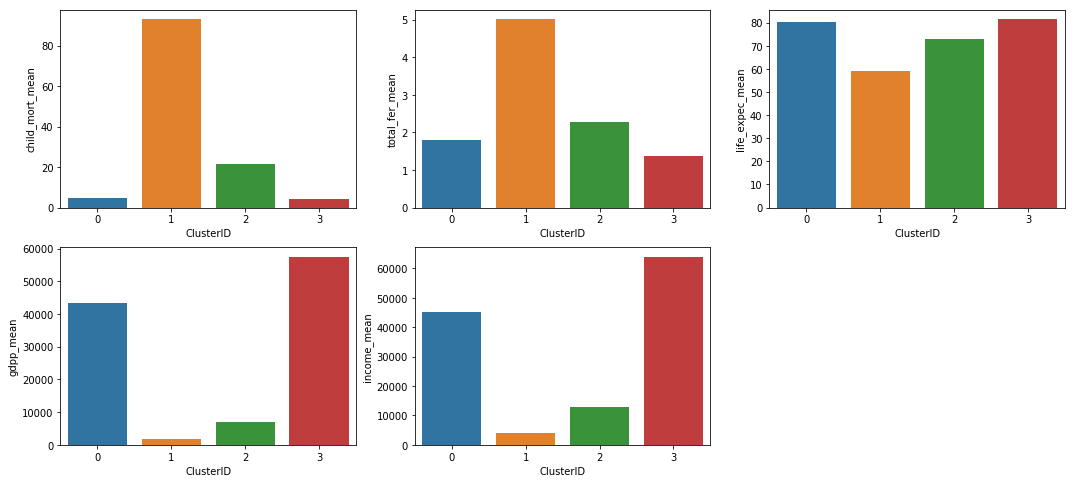

In [49]:
plt.figure(figsize=(18,8))
plt.subplot(231)
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)

plt.subplot(232)
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)

plt.subplot(233)
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)

plt.subplot(234)
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)

plt.subplot(235)
sns.barplot(x=df.ClusterID, y=df.income_mean)

In [50]:
#sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

### Clusters formed:
- Cluster 1: These are the countries with a very low child mortality, high life expectancy, high gdp & high income groups. So these countries seem to be doing good on their own.
- Cluster 2: These are the countries with a very high rate of child mortality with a very low gdpp & low income. These countries actually need immediate attention
- Cluster 3: This group seems to be doing OK having a relatively low value of child mortality, high income and gdp. So these are good on their own too
- Cluster 4: This appears to represent some really developed countries having good income, gdp and the least child mortality. These ones definitely are not striving for additional aid.

So countries in CLuster 2 need the aid for sure


In [51]:
df_pca_clustered_km.ClusterID.value_counts()

2    87
1    47
0    30
3     3
Name: ClusterID, dtype: int64

In [52]:
df.head()

,ClusterID,child_mort_mean,total_fer_mean,life_expec_mean,gdpp_mean,income_mean
0,0,4.953333,1.795333,80.376667,43333.333333,45250.000000
1,1,92.961702,5.008085,59.187234,1922.382979,3942.404255
2,2,21.389655,2.286552,72.935632,6919.103448,12968.620690
3,3,4.133333,1.380000,81.433333,57566.666667,64033.333333


In [53]:
#Lets compare the KPIs of the countries in Cluster 2 with the mean values of the attributes driving the Principal Component
cluster = df_pca_clustered_km.loc[(df_pca_clustered_km.ClusterID==1)]

cluster.loc[(cluster.gdpp <= 1922.38) & (cluster.income<3942.40) & (cluster.child_mort>92.96) ]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,-2.673005,0.411199,-0.237232,0.289668,-1.411854,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,-3.122430,0.034132,-0.448309,1.085256,-0.705788,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,-2.898911,-0.426694,-1.360086,1.809782,0.742353,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,-2.808332,0.073705,-0.327757,0.551092,-1.313929,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,-3.965158,0.383685,-0.317099,0.924645,-1.871714,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,-3.558249,1.283684,-0.093900,1.219203,-1.193889,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,-3.173421,1.050880,-0.016341,1.572625,0.693081,1
40,Cote d'Ivoire,111.0,50.60,5.30,43.3,2690,5.390,56.3,5.27,1220,-2.582132,1.204574,-0.226755,0.670365,-0.846254,1
63,Guinea,109.0,30.30,4.93,43.2,1190,16.100,58.0,5.34,648,-2.969565,0.729509,0.386107,0.670773,-0.182807,1
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.970,55.6,5.05,547,-2.833802,-0.095961,-1.206630,1.127756,-0.570452,1


### Conclusion - KMeans Clustering
- So below countries appear to be in direst need of money <br>
Burkina Faso <br>
Burundi <br>
Cameroon <br>
Central African Republic <br>
Chad <br>
Congo, Dem. Rep. <br>
Cote d'Ivoire <br>
Guinea <br>
Guinea-Bissau <br>
Haiti <br>
Lesotho <br>
Mali <br>
Mauritania <br>
Mozambique <br>
Niger <br>
Sierra Leone <br>



## Heirarchical Clustering
 - Lets perform the clustering using the Hierachical technique as well and see the clusters 

In [54]:

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

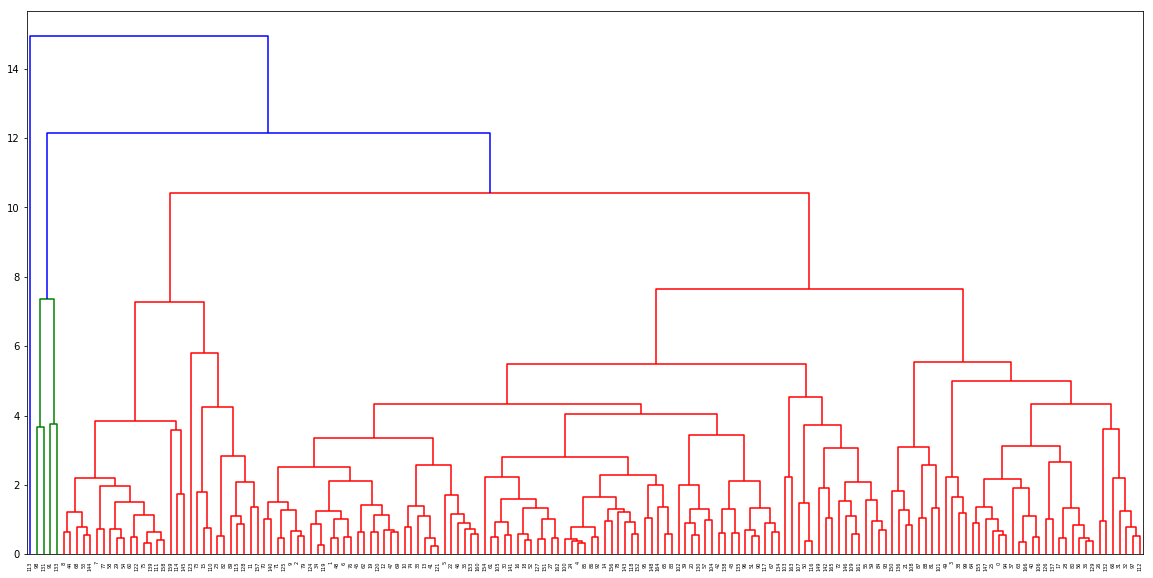

In [55]:
# heirarchical clustering
plt.figure(figsize=(20,10))
mergings = linkage(df_train_pca2, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [65]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
df1 = country_data
df_pca_clustered_hc = pd.concat([df1, clusterCut], axis=1)
#df_train_pca_clustered_hc.columns = ['country','child_mort', 'exports', 'health', 'imports', 'income','inflation','ClusterID']

In [66]:
df_pca_clustered_hc.rename(columns={0:"ClusterID"},inplace=True)
df_pca_clustered_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [67]:
df_pca_clustered_hc.ClusterID.value_counts()

0    132
1     30
2      4
3      1
Name: ClusterID, dtype: int64

In [68]:
#Examining the cluster KPIs
hc_clusters_child_mort = pd.DataFrame(df_pca_clustered_hc.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_total_fer = pd.DataFrame(df_pca_clustered_hc.groupby(["ClusterID"]).total_fer.mean())
hc_clusters_life_expec = pd.DataFrame(df_pca_clustered_hc.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_gdpp = pd.DataFrame(df_pca_clustered_hc.groupby(["ClusterID"]).gdpp.mean())
hc_clusters_income = pd.DataFrame(df_pca_clustered_hc.groupby(["ClusterID"]).income.mean())
#hc_clusters_inflation = pd.DataFrame(df_pca_clustered_hc.groupby(["ClusterID"]).inflation.mean())

In [69]:
df_hc = pd.concat([pd.Series([0,1,2,3]), hc_clusters_child_mort, hc_clusters_total_fer, hc_clusters_life_expec, hc_clusters_gdpp,hc_clusters_income], axis=1)
df_hc.columns = ['ClusterID','child_mort_mean', 'total_fer_mean', 'life_expec_mean', 'gdpp_mean','income_mean']

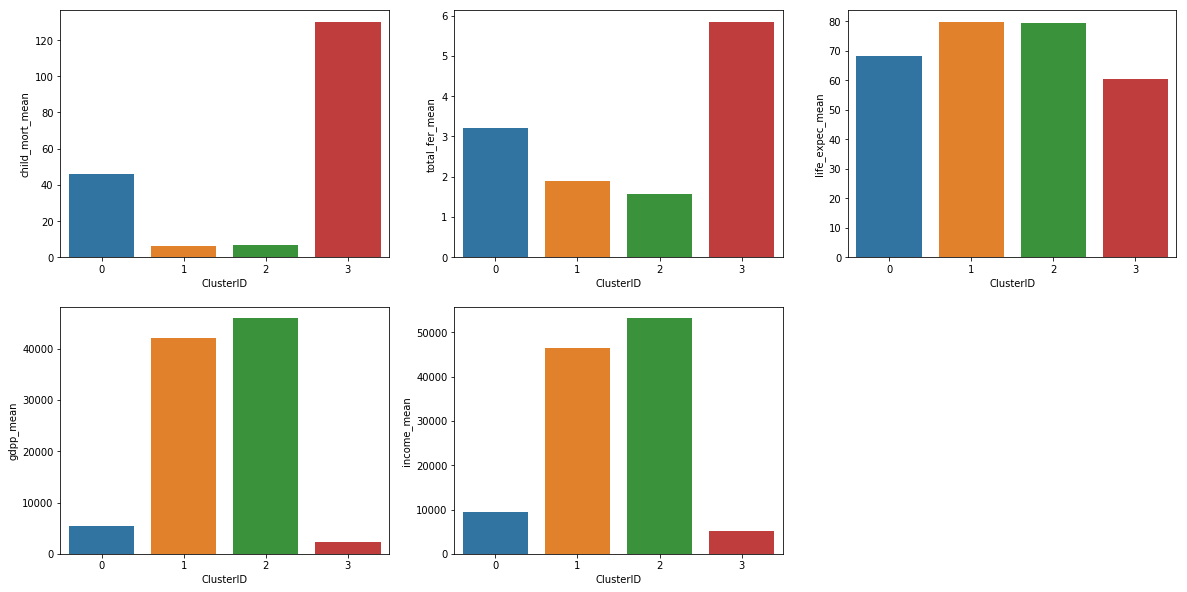

In [70]:
plt.figure(figsize=(20,10))
plt.subplot(231)
sns.barplot(x=df_hc.ClusterID, y=df_hc.child_mort_mean)

plt.subplot(232)
sns.barplot(x=df_hc.ClusterID, y=df_hc.total_fer_mean)

plt.subplot(233)
sns.barplot(x=df_hc.ClusterID, y=df_hc.life_expec_mean)

plt.subplot(234)
sns.barplot(x=df_hc.ClusterID, y=df_hc.gdpp_mean)

plt.subplot(235)
sns.barplot(x=df_hc.ClusterID, y=df_hc.income_mean)

### Clusters formed:
- Cluster 1: These are the countries with a relatively low child mortality, average gdp and lower than average income.<br>
            These countries still are not in as much need of immediate aid as the other group of countries
- Cluster 2: This appears to represent some really developed countries having good income, gdp and the least child mortality. These ones definitely are not striving for additional aid.
- Cluster 3: This group seems to be doing good having decent values in all the KPIS. There are almost developed nations with a good per capita income
- Cluster 4: These are the countries with a very high child mortality, high life expectancy, average gdp & a very low income groups. <br>
            These countries do need some aid to develop
            
            
So countries in CLuster 2 need the aid for sure


In [83]:
df_hc.loc[df_hc.ClusterID==3]

,ClusterID,child_mort_mean,total_fer_mean,life_expec_mean,gdpp_mean,income_mean
3,3,130.0,5.84,60.5,2330.0,5150.0


In [84]:
#Lets compare the KPIs of the countries in Cluster 2 with the mean values of the attributes
cluster = df_pca_clustered_hc.loc[(df_pca_clustered_hc.ClusterID==0)]

cluster.loc[(cluster.gdpp < 2330) & (cluster.income<5150) & (cluster.child_mort>130)]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,0
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,0
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,0
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,0
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,0


### Conclusion - Hierarchical Clustering

- So as we see, as per Hierarchical clustering also, the below countries are in direst need for money:<br>
Central African Republic<br>
Chad<br>
Haiti<br>
Mali<br>
Sierra Leone<br>